In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [3]:
df = pd.read_csv("../data/creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

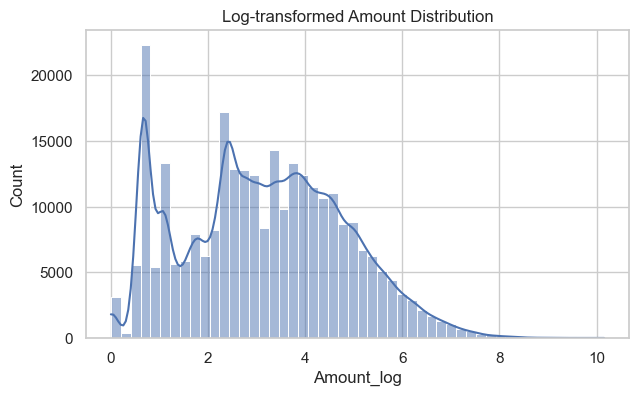

In [5]:
df["Amount_log"] = np.log1p(df["Amount"])
df[["Amount", "Amount_log"]].head()

#visualize original Amount distribution
plt.figure(figsize=(7,4))
sns.histplot(df["Amount_log"], bins=50, kde=True)
plt.title("Log-transformed Amount Distribution")
plt.show()



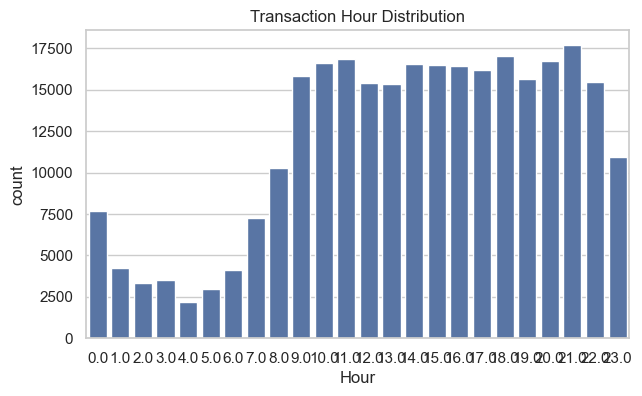

In [6]:
df["Hour"] = (df["Time"] // 3600) % 24
df[["Time", "Hour"]].head()

#visualize transaction counts by hour
plt.figure(figsize=(7,4))
sns.countplot(x=df["Hour"])
plt.title("Transaction Hour Distribution")
plt.show()



In [7]:
corr = df.corr(numeric_only=True)["Class"].sort_values(ascending=False)
corr


Class         1.000000
V11           0.154876
V4            0.133447
V2            0.091289
V21           0.040413
V19           0.034783
V20           0.020090
V8            0.019875
V27           0.017580
V28           0.009536
Amount        0.005632
V26           0.004455
V25           0.003308
V22           0.000805
V23          -0.002685
V15          -0.004223
V13          -0.004570
V24          -0.007221
Amount_log   -0.008326
Time         -0.012323
Hour         -0.017109
V6           -0.043643
V5           -0.094974
V9           -0.097733
V1           -0.101347
V18          -0.111485
V7           -0.187257
V3           -0.192961
V16          -0.196539
V10          -0.216883
V12          -0.260593
V14          -0.302544
V17          -0.326481
Name: Class, dtype: float64

In [8]:
X = df.drop(columns=["Class"])
y = df["Class"]

X.head(), y.head()


(   Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V22       V23       V24       V25       V26  \
 0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
 1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895   
 2  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
 3  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
 4 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010  0.502292   
 
         V27      

In [9]:
df.to_csv("../data/creditcard_preprocessed.csv", index=False)
